In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from PIL import Image

C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [2]:
data = []
labels = []
classes = 43
current_path = os.getcwd()

for i in range(classes):
    path = os.path.join(current_path, "train", str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + "\\" + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error Loading Image")
            
data = np.array(data)
labels = np.array(labels)

In [3]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [5]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation = "relu", input_shape = X_train.shape[1:]))
model.add(Conv2D(32, (5, 5), activation = "relu"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(43, activation = "softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["acc"])

In [7]:
history = model.fit( X_train, y_train, epochs = 15, validation_data = (X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 7s 235us/sample - loss: 0.8760 - acc: 0.7924 - val_loss: 0.1476 - val_acc: 0.9649
Epoch 2/15
31367/31367 [==============================] - 6s 192us/sample - loss: 0.2088 - acc: 0.9426 - val_loss: 0.0885 - val_acc: 0.9765
Epoch 3/15
31367/31367 [==============================] - 6s 192us/sample - loss: 0.1343 - acc: 0.9622 - val_loss: 0.0843 - val_acc: 0.9778
Epoch 4/15
31367/31367 [==============================] - 6s 193us/sample - loss: 0.1245 - acc: 0.9657 - val_loss: 0.0915 - val_acc: 0.9773
Epoch 5/15
31367/31367 [==============================] - 6s 191us/sample - loss: 0.1098 - acc: 0.9691 - val_loss: 0.0778 - val_acc: 0.9791
Epoch 6/15
31367/31367 [==============================] - 6s 194us/sample - loss: 0.0975 - acc: 0.9731 - val_loss: 0.0728 - val_acc: 0.9825
Epoch 7/15
31367/31367 [==============================] - 6s 196us/sample - loss: 0.0946 - acc: 0.9753 - val_lo

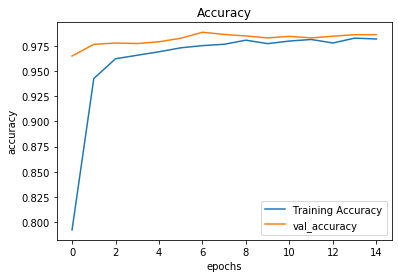

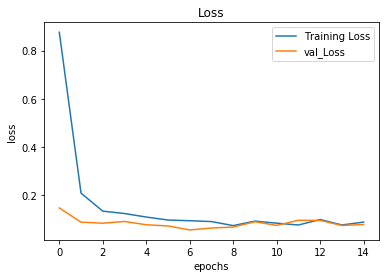

In [8]:
plt.plot(history.history["acc"], label = "Training Accuracy")
plt.plot(history.history["val_acc"], label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "val_Loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [9]:
y_test = pd.read_csv("Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))
    
X_test = np.array(data)

prediction = model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(labels, prediction)

0.9324623911322248

In [10]:
model.save("Traffic_Classification_GPU.h6")